In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\kaval\Downloads\Project_73_Data-MLR.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   vehicleType                               988 non-null    object 
 1   Payload                                   988 non-null    int64  
 2   Type                                      988 non-null    object 
 3   Dist_To_Travel                            988 non-null    object 
 4   region/non_region                         988 non-null    object 
 5   Given_Mileage_km_litre                    988 non-null    float64
 6   Fuel_Consumption_Overall_in_per_100km     988 non-null    float64
 7   Total_Emission_of_pollutants_gms_per_ltr  988 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 61.9+ KB


In [4]:
# df=data.iloc[:,[23,22,24,33,34,35,36,37,38,39,40]] #plotting considering numerical columns

In [5]:
df.columns

Index(['vehicleType', 'Payload', 'Type', 'Dist_To_Travel', 'region/non_region',
       'Given_Mileage_km_litre', 'Fuel_Consumption_Overall_in_per_100km',
       'Total_Emission_of_pollutants_gms_per_ltr'],
      dtype='object')

In [6]:
df.head()

,vehicleType,Payload,Type,Dist_To_Travel,region/non_region,Given_Mileage_km_litre,Fuel_Consumption_Overall_in_per_100km,Total_Emission_of_pollutants_gms_per_ltr
0,32 FT Single-Axle 7MT - HCV,7000,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle,6.00,16.666667,440.000000
1,32 FT Single-Axle 7MT - HCV,7000,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle,5.91,16.920474,446.700508
2,32 FT Single-Axle 7MT - HCV,7000,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle,5.86,17.064846,450.511945
3,32 FT Single-Axle 7MT - HCV,7000,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle,5.80,17.241379,455.172414
4,32 FT Single-Axle 7MT - HCV,7000,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle,5.78,17.301038,456.747405


In [7]:

duplicate = df.duplicated()
duplicate
sum(duplicate)

690

In [8]:

#check for missing values
df.isna()
df.isna().sum()

vehicleType                                 0
Payload                                     0
Type                                        0
Dist_To_Travel                              0
region/non_region                           0
Given_Mileage_km_litre                      0
Fuel_Consumption_Overall_in_per_100km       0
Total_Emission_of_pollutants_gms_per_ltr    0
dtype: int64

In [9]:
#df['vehicleType']=df['vehicleType'].fillna('Unknown')

In [10]:
df.columns

Index(['vehicleType', 'Payload', 'Type', 'Dist_To_Travel', 'region/non_region',
       'Given_Mileage_km_litre', 'Fuel_Consumption_Overall_in_per_100km',
       'Total_Emission_of_pollutants_gms_per_ltr'],
      dtype='object')

In [11]:
df.isnull().sum()

vehicleType                                 0
Payload                                     0
Type                                        0
Dist_To_Travel                              0
region/non_region                           0
Given_Mileage_km_litre                      0
Fuel_Consumption_Overall_in_per_100km       0
Total_Emission_of_pollutants_gms_per_ltr    0
dtype: int64

In [12]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


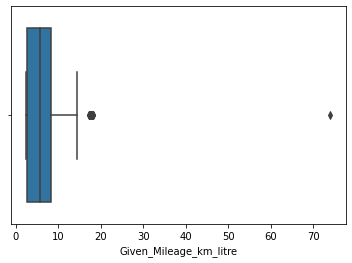

In [13]:
# let's find outliers in Salaries
sns.boxplot(df.Given_Mileage_km_litre)

# No outliers in age column

# Detection of outliers (find limits for salary based on IQR)
IQR = df['Given_Mileage_km_litre'].quantile(0.75) - df['Given_Mileage_km_litre'].quantile(0.25)
lower_limit = df['Given_Mileage_km_litre'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Given_Mileage_km_litre'].quantile(0.75) + (IQR * 1.5)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Given_Mileage_km_litre'>

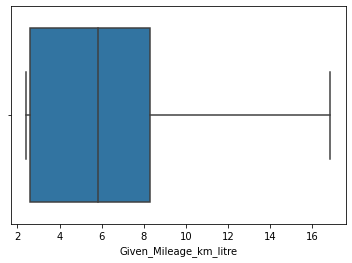

In [14]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Given_Mileage_km_litre'])

df['Given_Mileage_km_litre'] = winsor.fit_transform(df[['Given_Mileage_km_litre']])

# we can inspect the minimum caps and maximum caps 
# winsor.left_tail_caps_, winsor.right_tail_caps_

# lets see boxplot
sns.boxplot(df.Given_Mileage_km_litre)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Consumption_Overall_in_per_100km'>

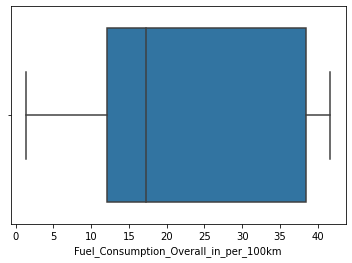

In [17]:
# let's find outliers in Salaries
sns.boxplot(df.Fuel_Consumption_Overall_in_per_100km)

# no outliers were found

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Emission_of_pollutants_gms_per_ltr'>

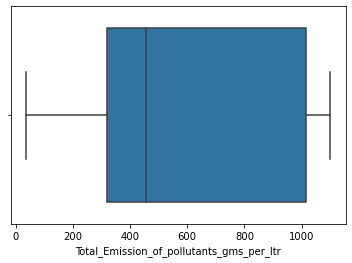

In [18]:
# lets see boxplot
sns.boxplot(df.Total_Emission_of_pollutants_gms_per_ltr)
# no outliers were found

In [14]:
# pip install feature_engine

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

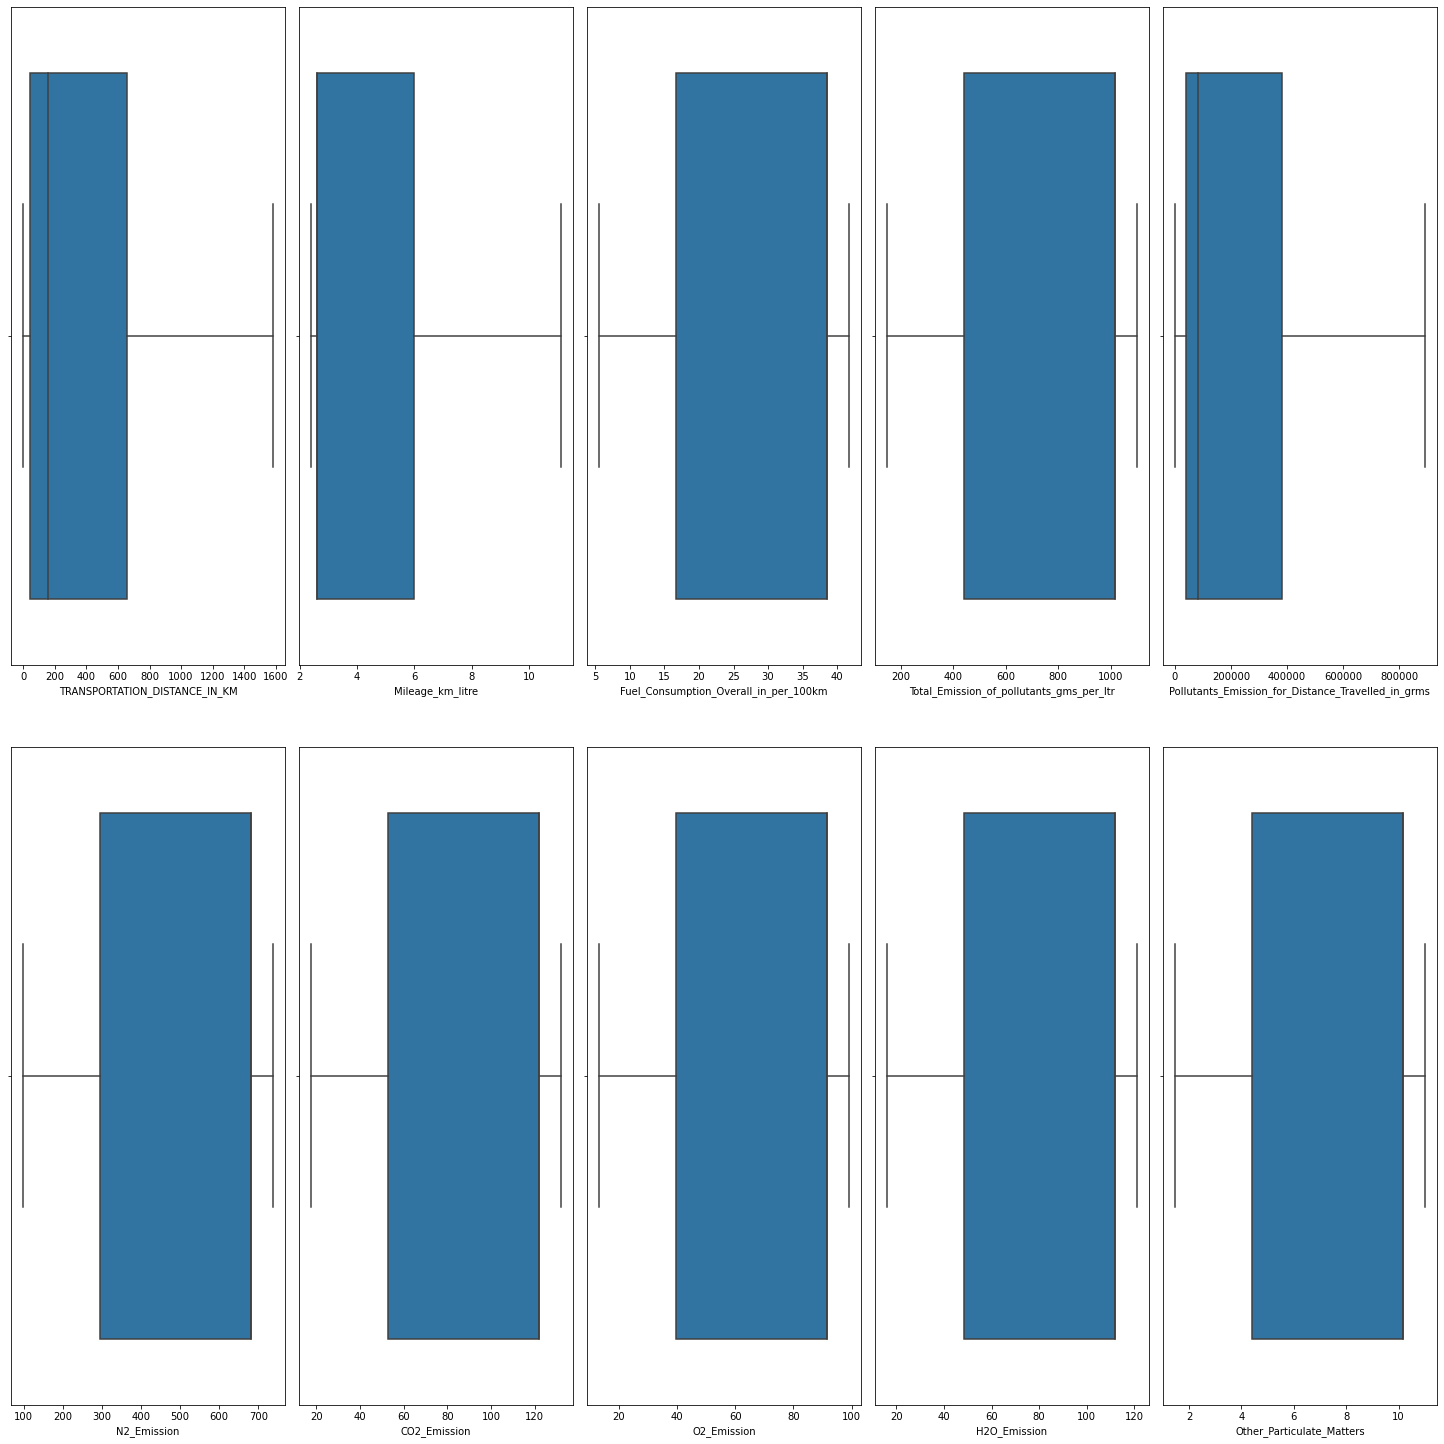

In [16]:
##   after outlier analysis by using winserization
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20,20))
index = 0
ax = ax.flatten()

for col in dta.columns:
    sns.boxplot(dta[col], ax = ax[index])
    index  = index +  1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

# Univariate Visualization

<Figure size 1440x1440 with 0 Axes>

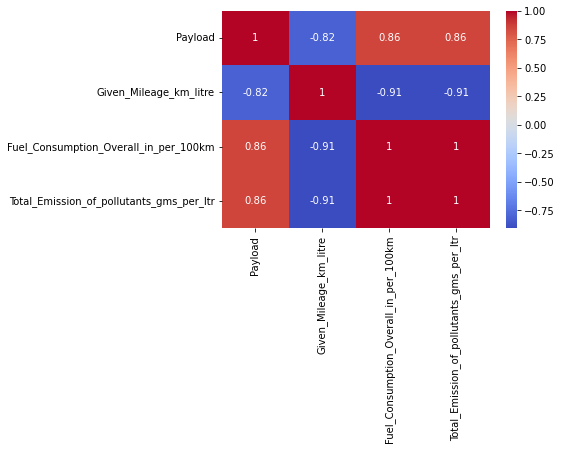

<Figure size 1440x1440 with 0 Axes>

In [19]:
# Heat Map
corr = df.corr()
sns.heatmap(corr, annot = True , cmap = 'coolwarm')
plt.figure(figsize = (20,20))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

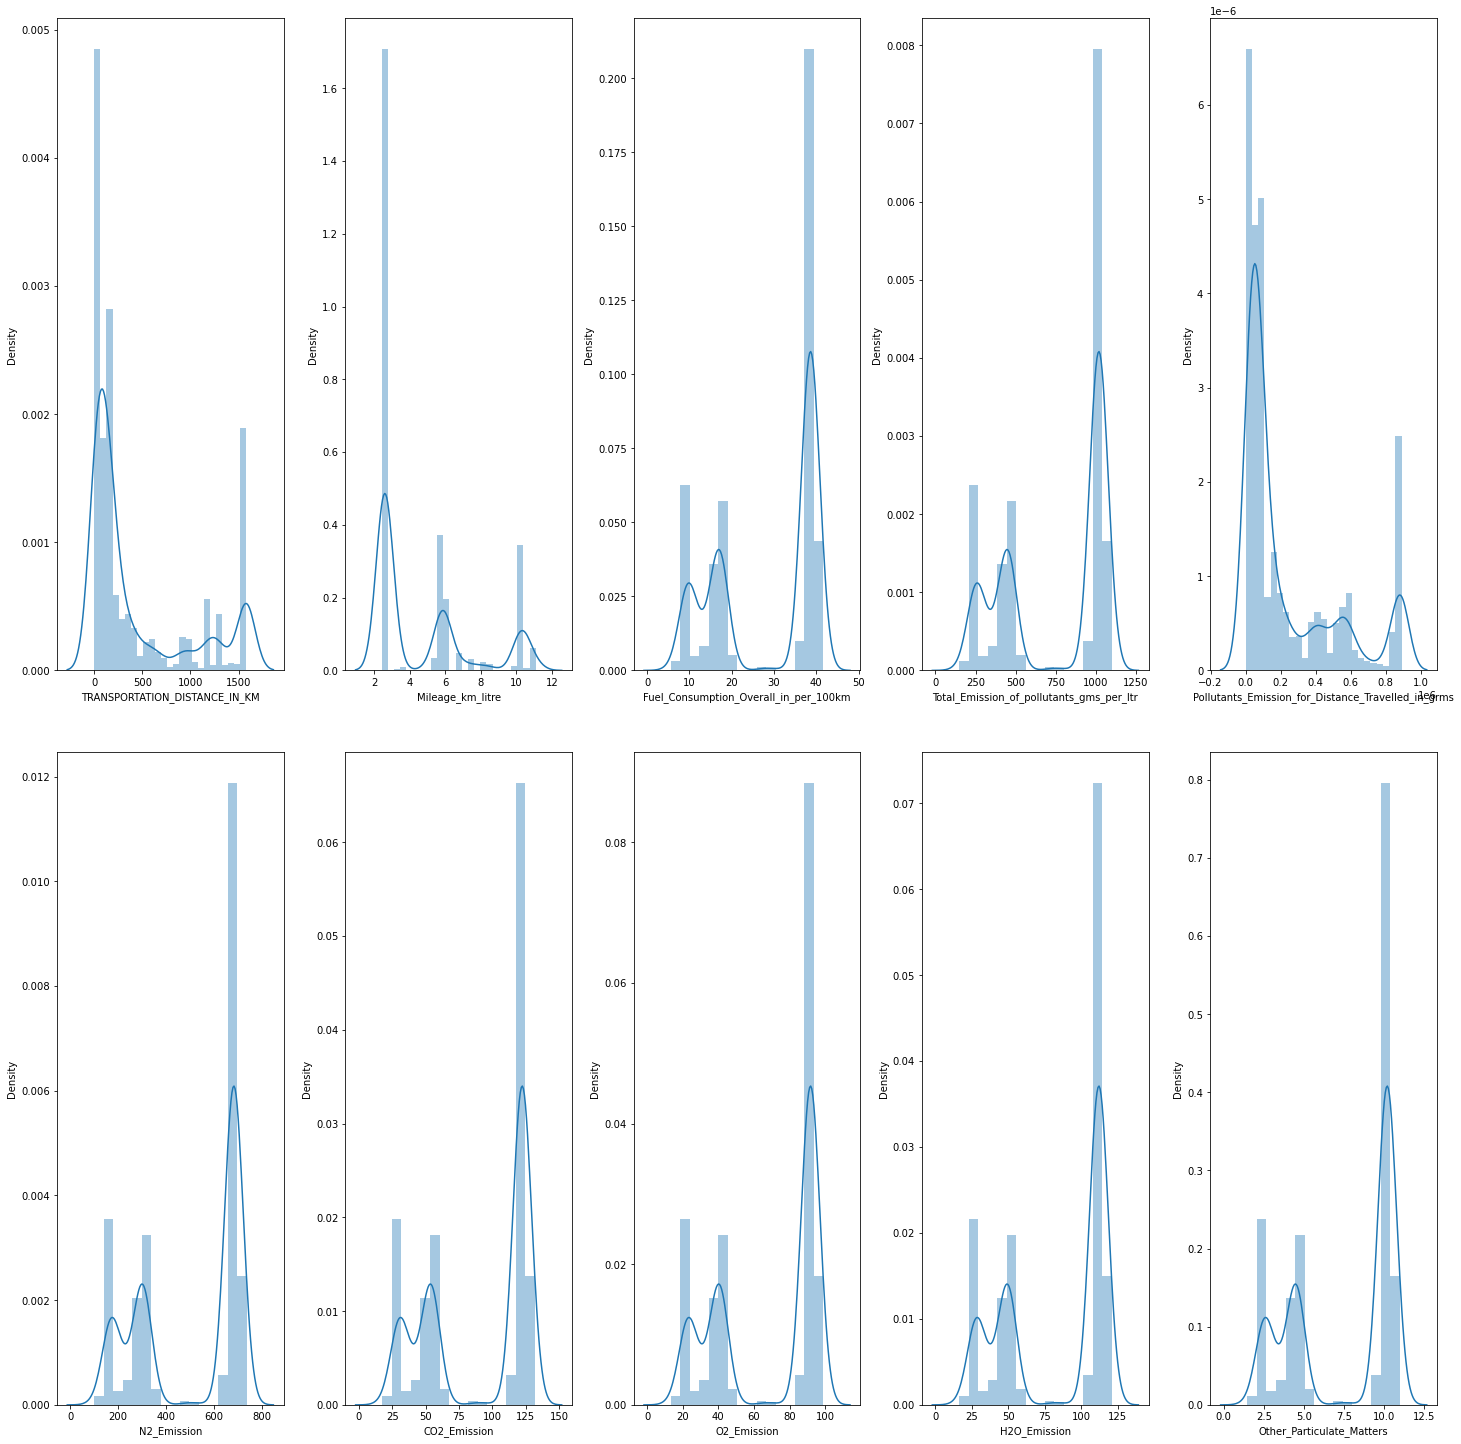

In [18]:
## create dist plot
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20,20))
index = 0
ax = ax.flatten()

for col in dta.columns:
    sns.distplot(dta[col], ax = ax[index])
    index  = index +  1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

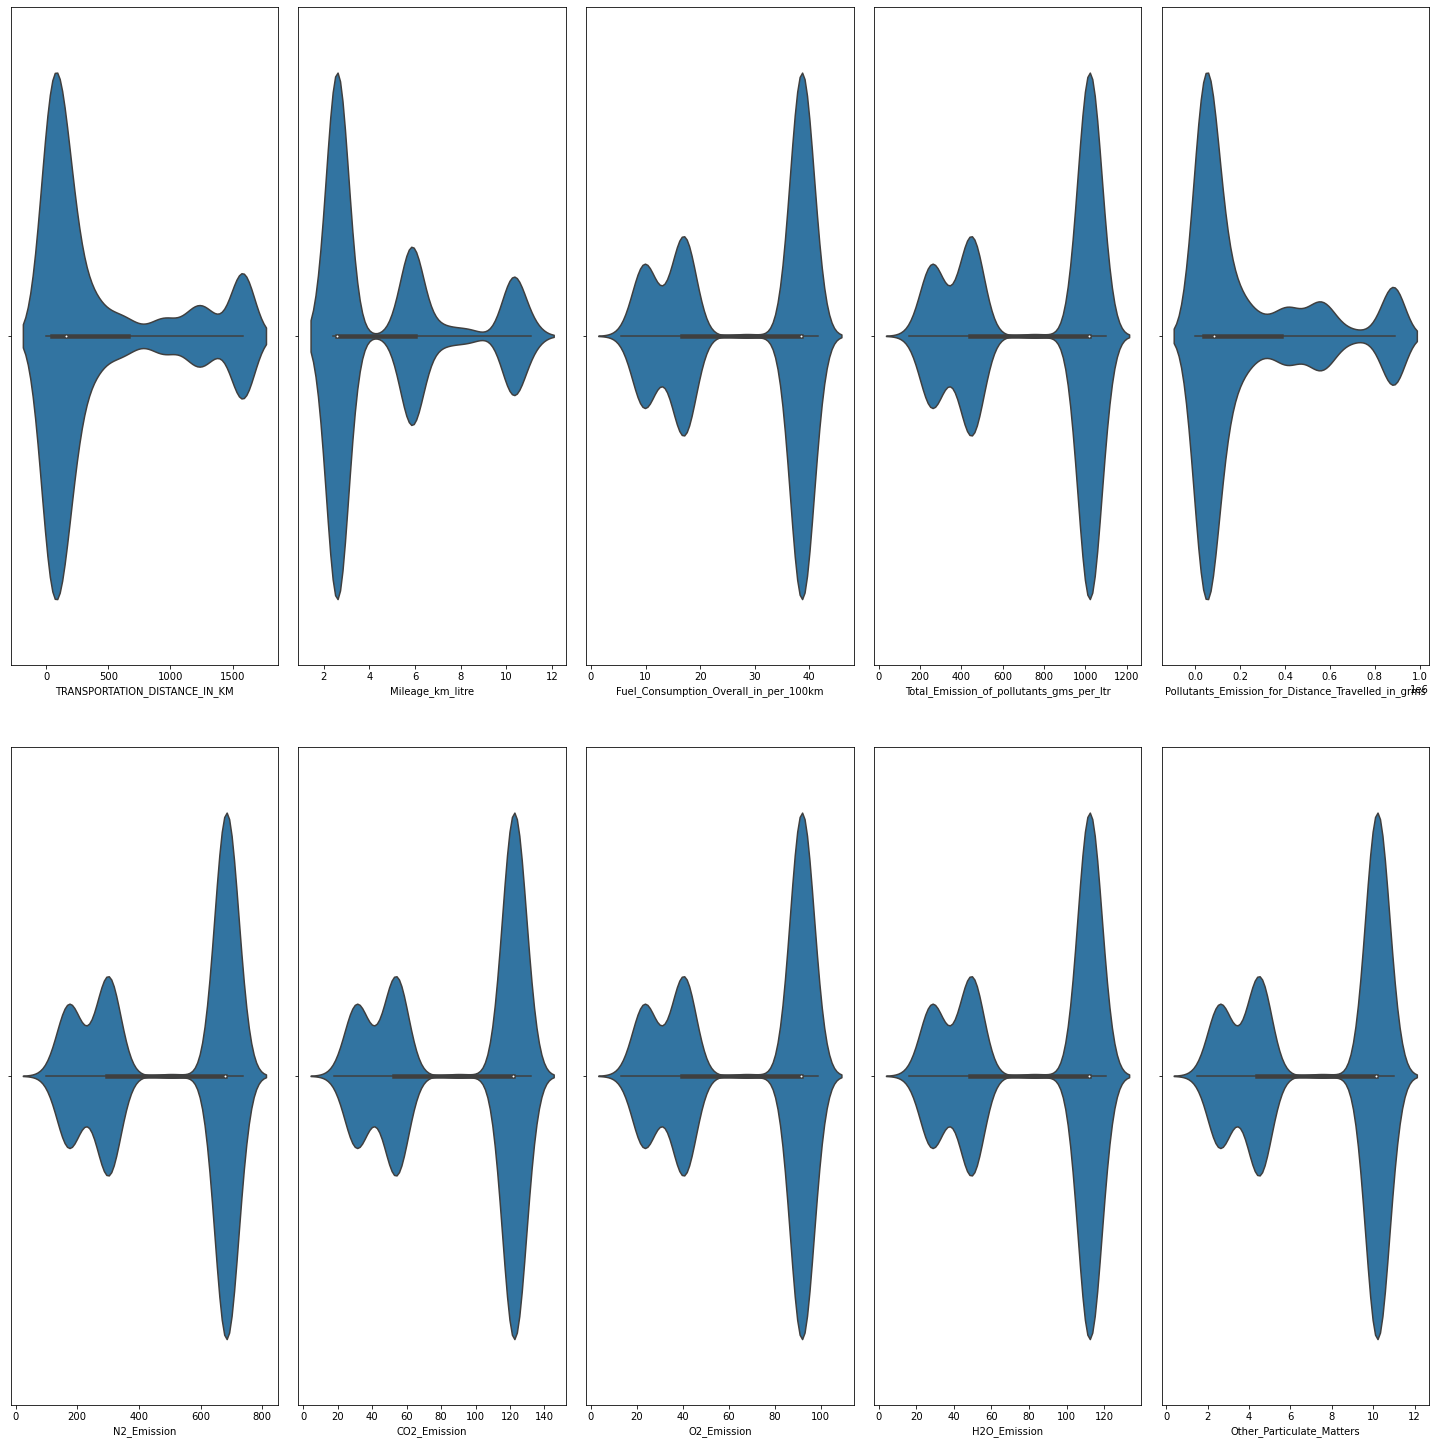

In [19]:
## creating Violin plot
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20,20))
index = 0
ax = ax.flatten()

for col in dta.columns:
    sns.violinplot(dta[col], ax = ax[index])
    index  = index +  1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

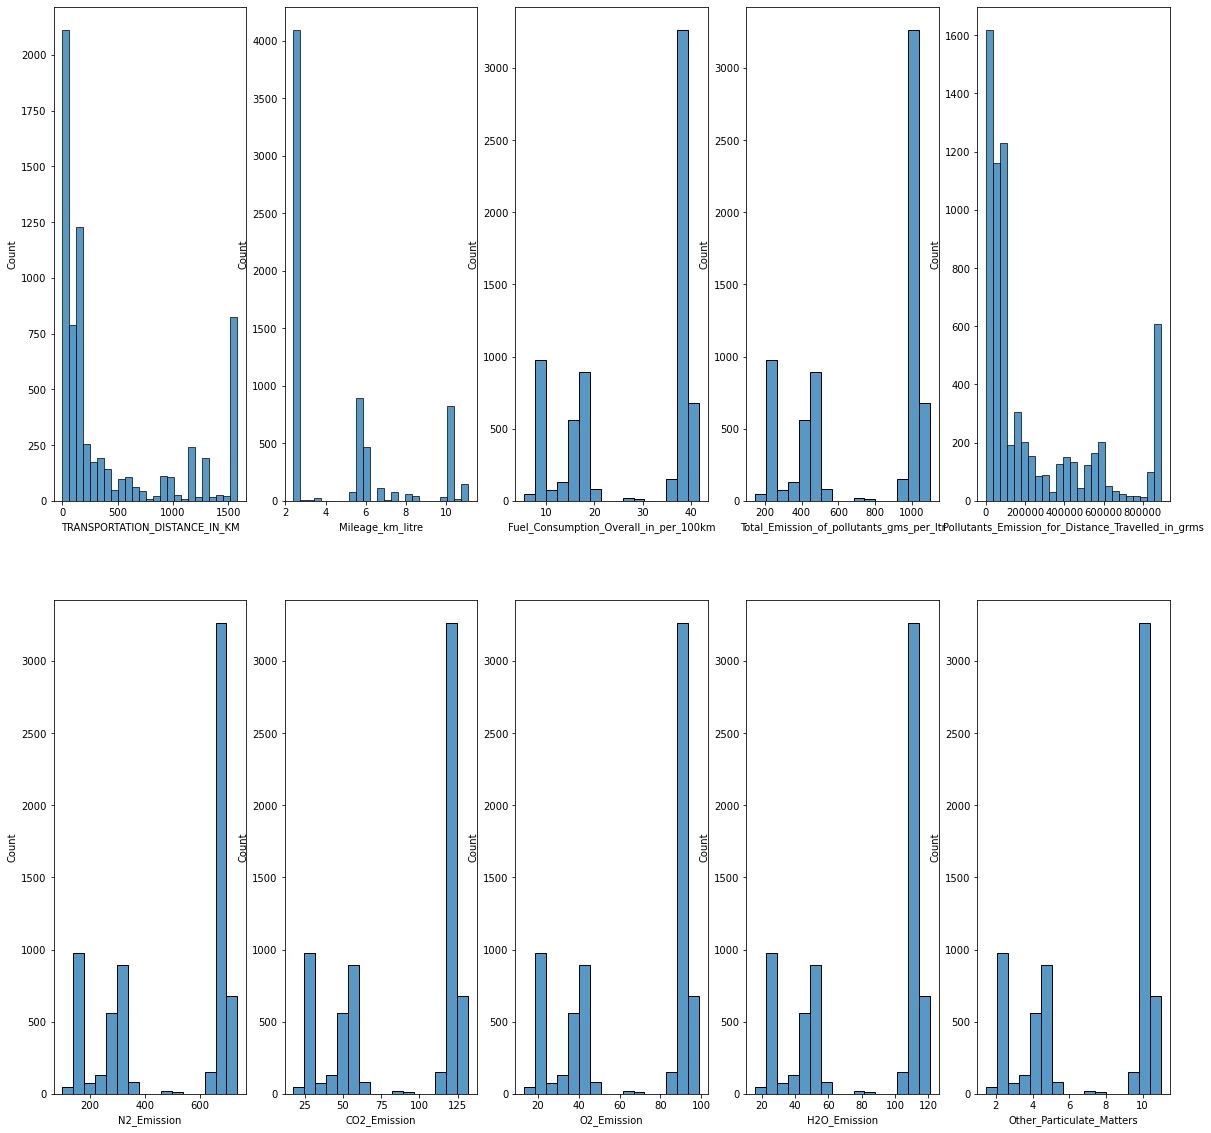

In [20]:

## creating Hist plot
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20,20))
index = 0
ax = ax.flatten()

for col in dta.columns:
    sns.histplot(dta[col], ax = ax[index])
    index  = index +  1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '32 FT Single-Axle 7MT - HCV'),
  Text(1, 0, '32 FT Multi-Axle 14MT - HCV'),
  Text(2, 0, '1 MT Tata Ace (Open Body)'),
  Text(3, 0, '24 FT SXL Container'),
  Text(4, 0, '32 FT Multi-Axle MXL 18MT'),
  Text(5, 0, '19 FT OPEN BODY 8 MT'),
  Text(6, 0, '17 FT Container'),
  Text(7, 0, '20 FT SXL Container'),
  Text(8, 0, '1 MT Tata Ace (Closed Body)'),
  Text(9, 0, '19 FT Open 7MT - MCV'),
  Text(10, 0, '1.5 MT Pickup (Open Body)'),
  Text(11, 0, '40 FT 3XL Trailer 35MT'),
  Text(12, 0, '40 FT Flat Bed Multi-Axle 27MT - Trailer'),
  Text(13, 0, '20 FT CLOSE 7MT-MCV '),
  Text(14, 0, '14 FT Open - 3 MT'),
  Text(15, 0, '1.5 MT Vehicle (Closed Body)'),
  Text(16, 0, '24 / 26 FT Taurus Open 21MT - HCV'),
  Text(17, 0, '32 FT Closed Container 15 MT'),
  Text(18, 0, '20 FT Open 9MT - MCV')

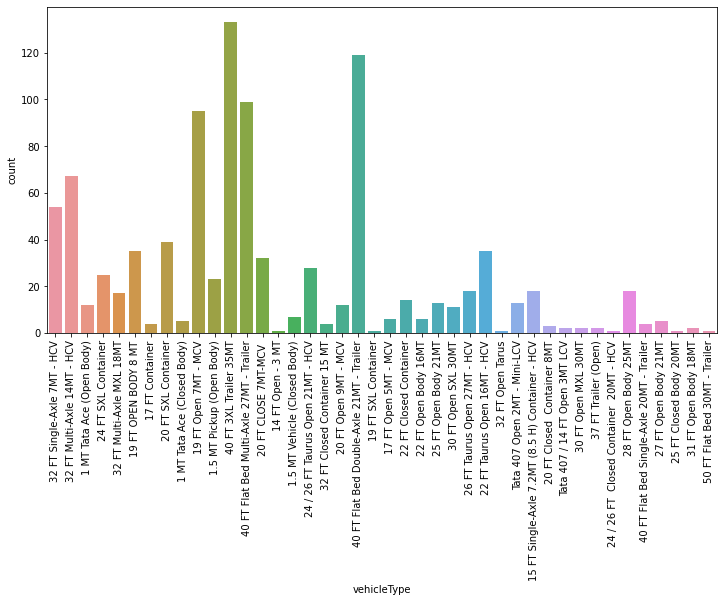

In [20]:
## Creating Count plot
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.countplot(x=df["vehicleType"])
plt.xticks(rotation = 90)

#Bivariate Analysis 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

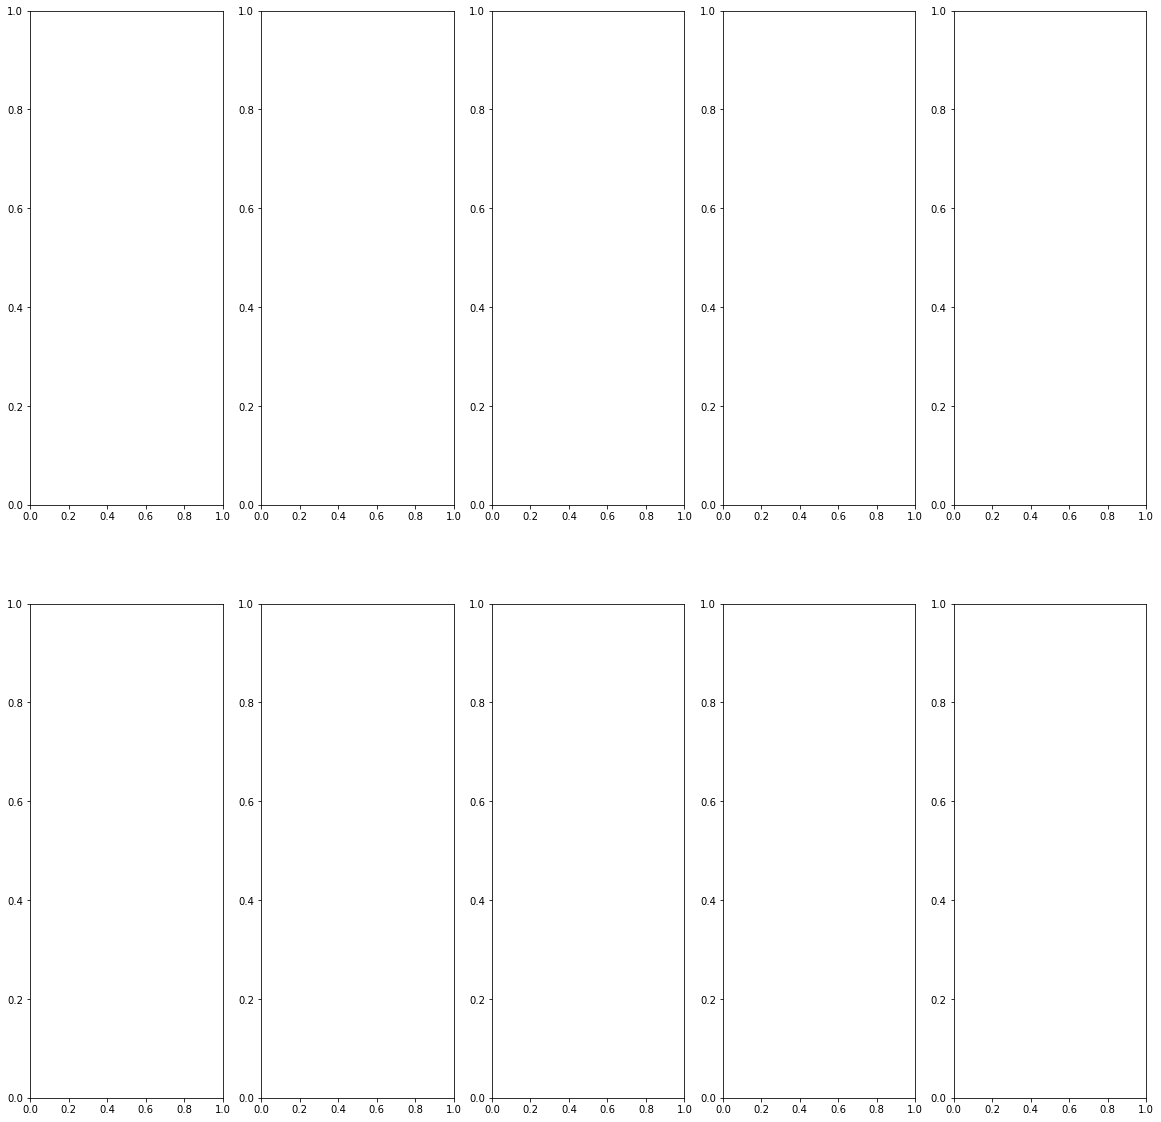

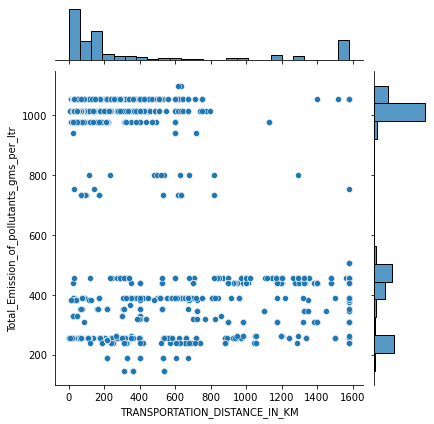

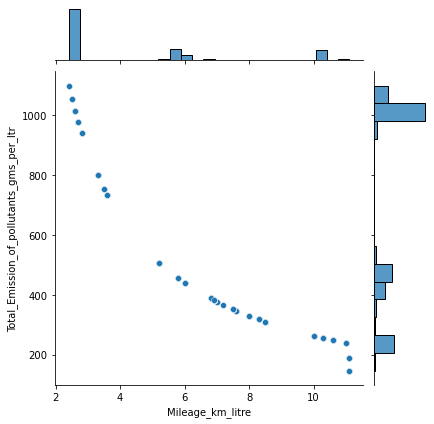

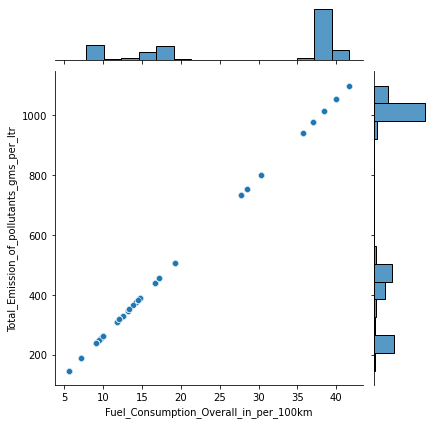

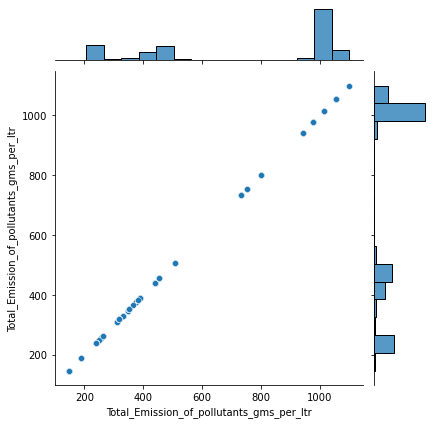

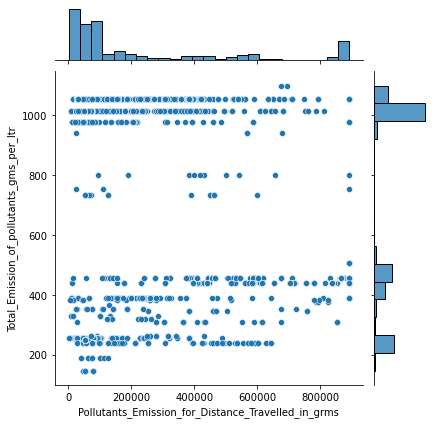

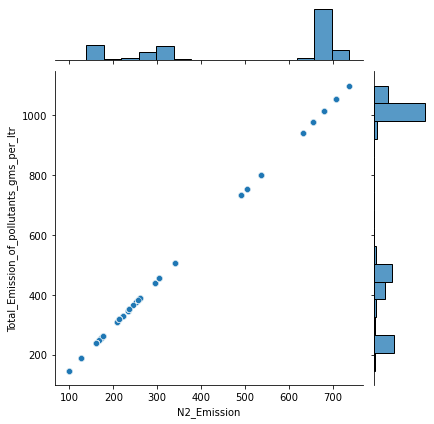

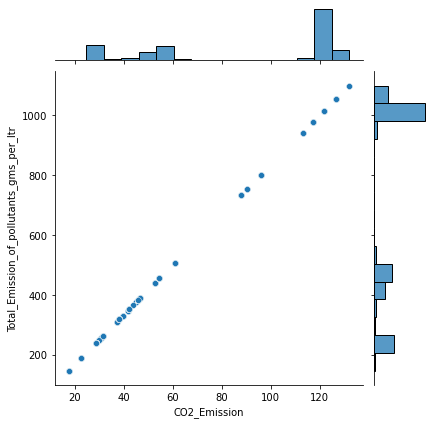

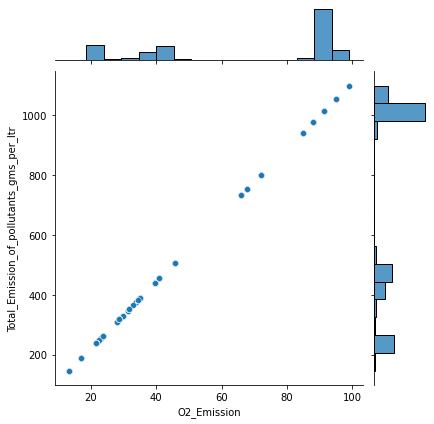

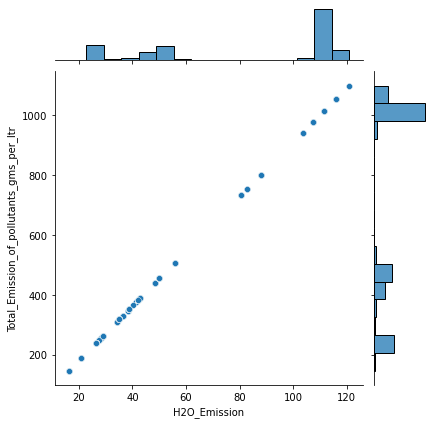

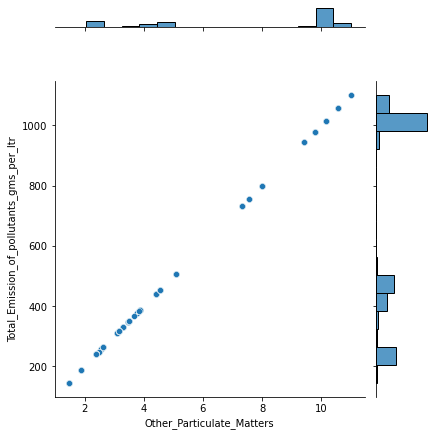

In [22]:

## creating joint plot
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20,20))
index = 0
ax = ax.flatten()

for col in dta.columns:
    sns.jointplot(dta[col], ax = ax[index],  y = df["Total_Emission_of_pollutants_gms_per_ltr"] )
    index  = index +  1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

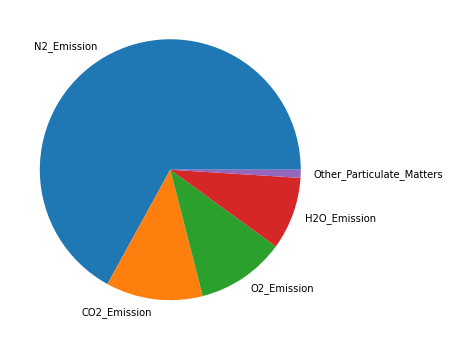

In [23]:
# Creating Pie Chart
pollutants = ['N2_Emission','CO2_Emission', 'O2_Emission', 'H2O_Emission','Other_Particulate_Matters']
class1_pollutants = [67, 12, 11, 9, 1]

plt.pie(class1_pollutants, labels = pollutants)
plt.show()

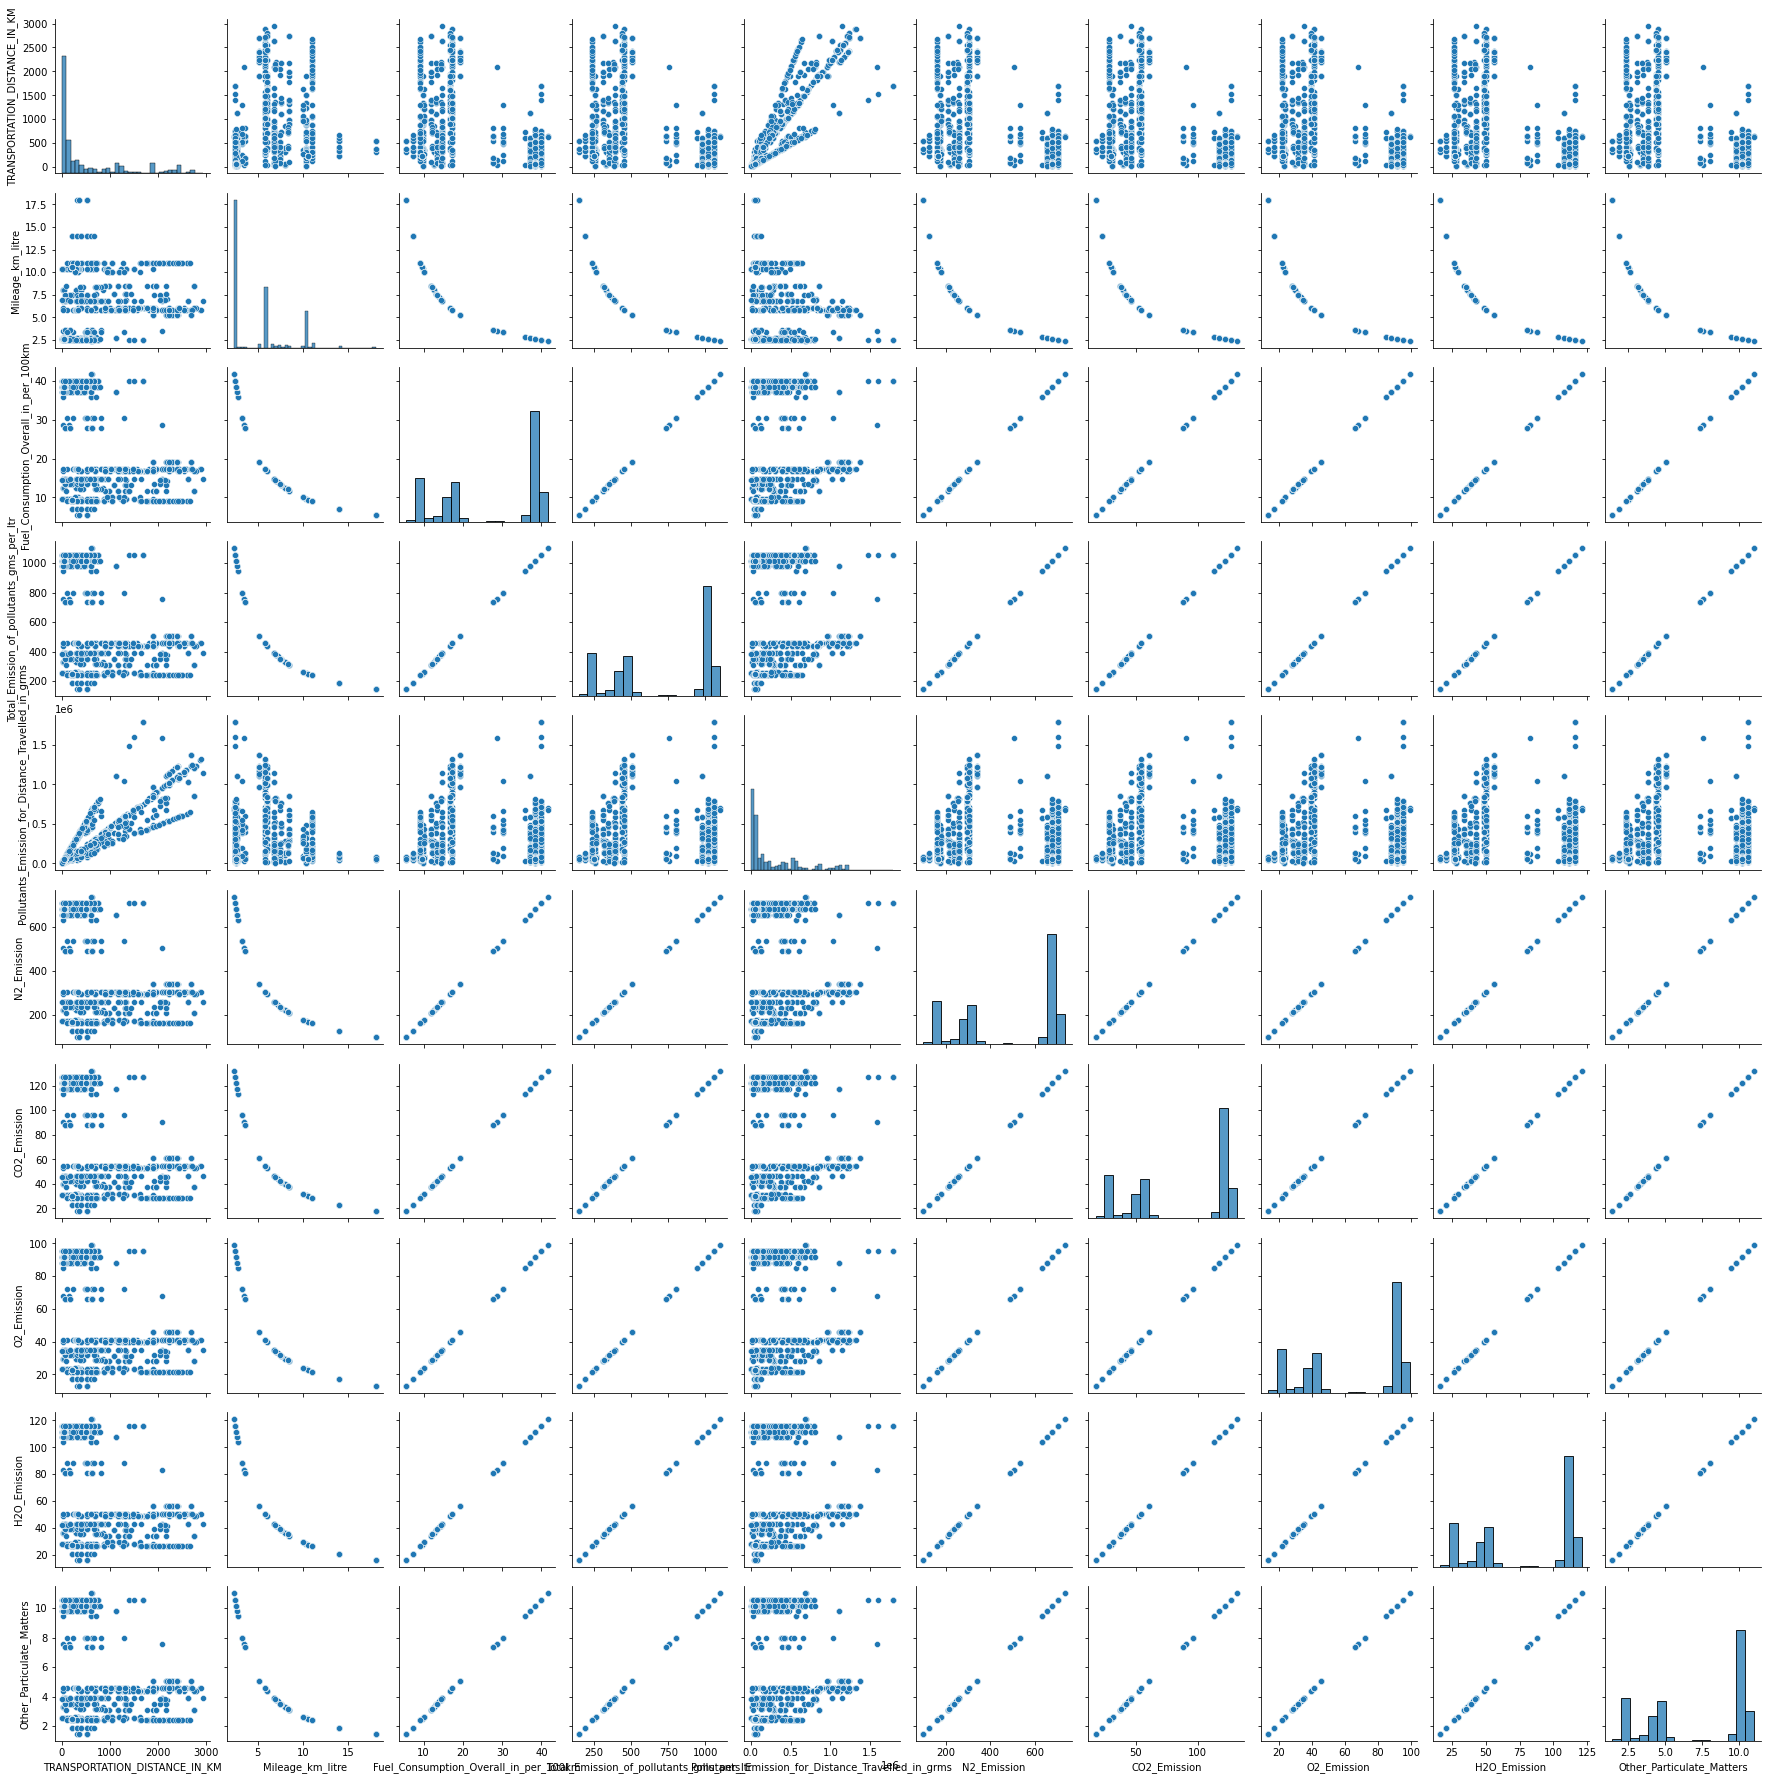

In [24]:
import seaborn as sns
sns.pairplot(df.iloc[:,:])

In [22]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
# Creating instance of labelencoder
labelencoder = LabelEncoder()


In [21]:
# LAbel encoding
###################

df.columns


Index(['vehicleType', 'Payload', 'Type', 'Dist_To_Travel', 'region/non_region',
       'Given_Mileage_km_litre', 'Fuel_Consumption_Overall_in_per_100km',
       'Total_Emission_of_pollutants_gms_per_ltr'],
      dtype='object')

In [23]:

# Data Split into Input and Output variables
X = df[['vehicleType', 'Type', 'Dist_To_Travel', 'region/non_region']]


In [24]:
X

,vehicleType,Type,Dist_To_Travel,region/non_region
0,32 FT Single-Axle 7MT - HCV,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle
1,32 FT Single-Axle 7MT - HCV,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle
2,32 FT Single-Axle 7MT - HCV,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle
3,32 FT Single-Axle 7MT - HCV,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle
4,32 FT Single-Axle 7MT - HCV,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle
...,...,...,...,...
983,25 FT Open Body 21MT,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle
984,40 FT 3XL Trailer 35MT,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle
985,40 FT 3XL Trailer 35MT,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle
986,40 FT 3XL Trailer 35MT,open,greater than 150km and more than2000kg,non_region_more than 25ft vehicle


In [25]:
X['vehicleType'] = labelencoder.fit_transform(X['vehicleType'])
X['Type'] = labelencoder.fit_transform(X['Type'])
X['Dist_To_Travel'] = labelencoder.fit_transform(X['Dist_To_Travel'])
X['region/non_region'] = labelencoder.fit_transform(X['region/non_region'])

C:\Users\kaval\AppData\Local\Temp/ipykernel_2616/2478443262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['vehicleType'] = labelencoder.fit_transform(X['vehicleType'])
C:\Users\kaval\AppData\Local\Temp/ipykernel_2616/2478443262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Type'] = labelencoder.fit_transform(X['Type'])
C:\Users\kaval\AppData\Local\Temp/ipykernel_2616/2478443262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [26]:
df.columns

Index(['vehicleType', 'Payload', 'Type', 'Dist_To_Travel', 'region/non_region',
       'Given_Mileage_km_litre', 'Fuel_Consumption_Overall_in_per_100km',
       'Total_Emission_of_pollutants_gms_per_ltr'],
      dtype='object')

In [27]:

y = df[['Payload', 'Given_Mileage_km_litre', 'Fuel_Consumption_Overall_in_per_100km', 'Total_Emission_of_pollutants_gms_per_ltr']]


In [28]:



### We have to convert y to data frame so that we can use concatenate function
# concatenate X and y
df_new = pd.concat([X, y], axis = 1)

In [31]:

## rename column name
df_new.columns


Index(['vehicleType', 'Type', 'Dist_To_Travel', 'region/non_region', 'Payload',
       'Given_Mileage_km_litre', 'Fuel_Consumption_Overall_in_per_100km',
       'Total_Emission_of_pollutants_gms_per_ltr'],
      dtype='object')

((array([-3.19410727e+00, -2.92862832e+00, -2.78046228e+00, -2.67595340e+00,
         -2.59441353e+00, -2.52716372e+00, -2.46970815e+00, -2.41940604e+00,
         -2.37456967e+00, -2.33405267e+00, -2.29703965e+00, -2.26292923e+00,
         -2.23126477e+00, -2.20169104e+00, -2.17392612e+00, -2.14774237e+00,
         -2.12295322e+00, -2.09940385e+00, -2.07696424e+00, -2.05552417e+00,
         -2.03498932e+00, -2.01527836e+00, -1.99632062e+00, -1.97805432e+00,
         -1.96042511e+00, -1.94338493e+00, -1.92689103e+00, -1.91090528e+00,
         -1.89539343e+00, -1.88032467e+00, -1.86567116e+00, -1.85140764e+00,
         -1.83751113e+00, -1.82396067e+00, -1.81073706e+00, -1.79782272e+00,
         -1.78520143e+00, -1.77285827e+00, -1.76077946e+00, -1.74895220e+00,
         -1.73736465e+00, -1.72600580e+00, -1.71486537e+00, -1.70393379e+00,
         -1.69320212e+00, -1.68266198e+00, -1.67230553e+00, -1.66212540e+00,
         -1.65211467e+00, -1.64226681e+00, -1.63257570e+00, -1.62303553e+00,

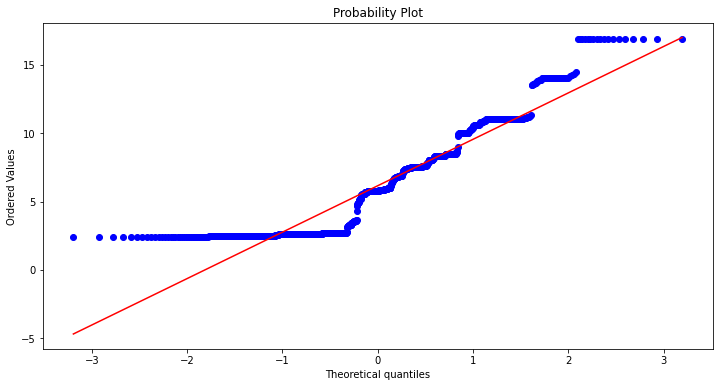

In [32]:
import scipy.stats as stats
import pylab
#4probplot
stats.probplot(df_new.Given_Mileage_km_litre, dist="norm", plot=pylab)

In [18]:
# stats.probplot(np.poly(df_new1.Total_Emission_of_pollutants_gms_per_km), dist="norm", plot=pylab)

In [19]:
import scipy.stats as stat
import pylab 

In [20]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(dta,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(dta[feature],dist='norm',plot=pylab)
    plt.show()
    

C:\Users\kaval\AppData\Local\Temp/ipykernel_33440/4001473568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['TRANSPORTATION_DISTANCE_IN_KM'],parameters=stat.boxcox(dta['TRANSPORTATION_DISTANCE_IN_KM']+1)


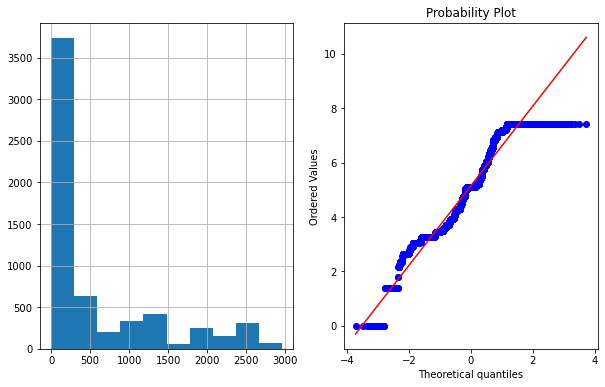

In [21]:
# Boxcox
dta['TRANSPORTATION_DISTANCE_IN_KM'],parameters=stat.boxcox(dta['TRANSPORTATION_DISTANCE_IN_KM']+1)
plot_data(dta,'TRANSPORTATION_DISTANCE_IN_KM')


C:\Users\kaval\AppData\Local\Temp/ipykernel_33440/4177484306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Mileage_km_litre']=np.log(dta['Mileage_km_litre'])


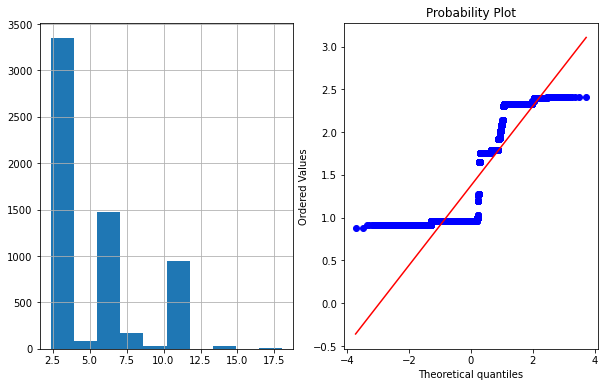

In [22]:
#Logarithmic Transformation
import numpy as np
dta['Mileage_km_litre']=np.log(dta['Mileage_km_litre'])
plot_data(dta,'Mileage_km_litre')

C:\Users\kaval\AppData\Local\Temp/ipykernel_33440/1263897232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Total_Emission_of_pollutants_gms_per_ltr']=dta.Total_Emission_of_pollutants_gms_per_ltr**(1/2)


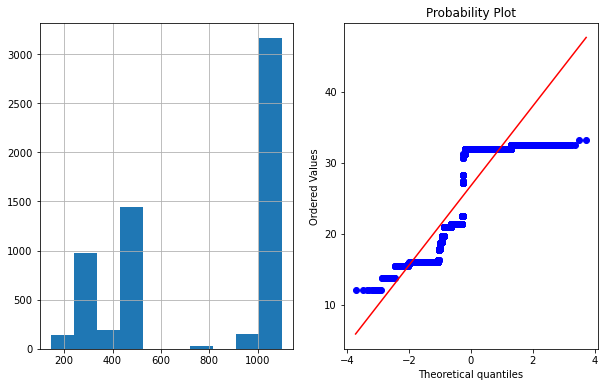

In [23]:

##### Square Root Transformation
dta['Total_Emission_of_pollutants_gms_per_ltr']=dta.Total_Emission_of_pollutants_gms_per_ltr**(1/2)
plot_data(dta,'Total_Emission_of_pollutants_gms_per_ltr')

C:\Users\kaval\AppData\Local\Temp/ipykernel_33440/1597875610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Fuel_Consumption_Overall_in_per_100km']=np.log1p(dta['Fuel_Consumption_Overall_in_per_100km'])


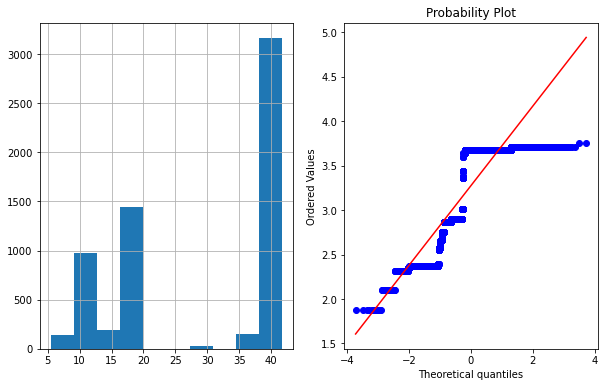

In [24]:
## Log Transformation
dta['Fuel_Consumption_Overall_in_per_100km']=np.log1p(dta['Fuel_Consumption_Overall_in_per_100km'])
plot_data(dta,'Fuel_Consumption_Overall_in_per_100km')

In [82]:
x = df_new.iloc[:, :-1]
x

,vehicleType,Type,Dist_To_Travel,region/non_region,Payload,Given_Mileage_km_litre,Fuel_Consumption_Overall_in_per_100km
0,33,1,0,0,7000,6.00,16.666667
1,33,1,0,0,7000,5.91,16.920474
2,33,1,0,0,7000,5.86,17.064846
3,33,1,0,0,7000,5.80,17.241379
4,33,1,0,0,7000,5.78,17.301038
...,...,...,...,...,...,...,...
983,22,1,0,0,21000,6.87,14.556041
984,35,1,0,0,35000,2.60,38.461538
985,35,1,0,0,35000,2.60,38.461538
986,35,1,0,0,35000,2.60,38.461538


In [42]:
Y = df_new.iloc[:, -1:]
Y

,Total_Emission_of_pollutants_gms_per_ltr
0,440.000000
1,446.700508
2,450.511945
3,455.172414
4,456.747405
...,...
983,384.279476
984,1015.384615
985,1015.384615
986,1015.384615


In [45]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X,Y)


LinearRegression()

In [49]:
df_new.columns

Index(['vehicleType', 'Type', 'Dist_To_Travel', 'region/non_region', 'Payload',
       'Given_Mileage_km_litre', 'Fuel_Consumption_Overall_in_per_100km',
       'Total_Emission_of_pollutants_gms_per_ltr'],
      dtype='object')

In [66]:
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('Total_Emission_of_pollutants_gms_per_ltr ~ vehicleType + Type + Dist_To_Travel + Payload + Given_Mileage_km_litre + Fuel_Consumption_Overall_in_per_100km',  data = df_new).fit() # regression model
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Total_Emission_of_pollutants_gms_per_ltr   R-squared:                       1.000
Model:                                                  OLS   Adj. R-squared:                  1.000
Method:                                       Least Squares   F-statistic:                 2.764e+32
Date:                                      Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                                              16:51:20   Log-Likelihood:                 27220.
No. Observations:                                       988   AIC:                        -5.443e+04
Df Residuals:                                           981   BIC:                        -5.439e+04
Df Model:                                                 6                                         
Covariance Type:                                  nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -1.119e-12   1.14e-13     -9.820      0.000   -1.34e-12   -8.95e-13
vehicleType                            2.337e-14    1.7e-15     13.780      0.000       2e-14    2.67e-14
Type                                    3.73e-14   2.64e-14      1.410      0.159   -1.46e-14    8.92e-14
Dist_To_Travel                        -4.263e-14   5.01e-14     -0.852      0.395   -1.41e-13    5.56e-14
Payload                                2.299e-17   1.68e-18     13.719      0.000    1.97e-17    2.63e-17
Given_Mileage_km_litre                 8.193e-14   9.15e-15      8.952      0.000     6.4e-14    9.99e-14
Fuel_Consumption_Overall_in_per_100km    26.4000   2.06e-15   1.28e+16      0.000      26.400      26.400
==============================================================================
Omnibus:                      226.652   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1277.083
Skew:                          -0.926   Prob(JB):                    4.84e-278
Kurtosis:                       8.253   Cond. No.                     2.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, Y, test_size=0.2, random_state=42)

In [56]:
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

In [57]:
from sklearn.metrics import r2_score

In [59]:
y_pred = regr.predict(x)

from sklearn.metrics import r2_score
r2_score1 = r2_score(y_pred,Y)

In [60]:
r2_score1

1.0

In [61]:
##  Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
mse = cross_val_score(regr,X,Y,scoring = "neg_mean_squared_error", cv = 5)
mean_mse = np.mean(mse)

mean_mse

-47158.39928478808

In [67]:

### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df_new, test_size = 0.2) # 20% test data


In [68]:

# prediction on test data set 
test_pred = ml1.predict(x_test)


In [69]:

# test residual values 
test_resid = test_pred - x_test.Total_Emission_of_pollutants_gms_per_ltr
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse


2.580586504508978e-13

In [70]:

# train_data prediction
train_pred = ml1.predict(x_train)

In [71]:

# train residual values 
train_resid  = train_pred - x_train.Total_Emission_of_pollutants_gms_per_ltr
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse


2.6324018545515026e-13

In [80]:
import pickle
# Saving model to disk
pickle.dump(regr, open('model_Prediction_73.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model_Prediction_73.pkl','rb'))
print(model.predict([[20, 2, 1,1, 11000, 8, 18]]))



[[475.2]]
